# PQC Expressivity

In [2]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *
from quantum_circuits import *
from kraus_channels import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Four Qubits

### Circuit Ensemble

In [9]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)


bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for L in range(0, 11):
    fid_list = []
    for i in tqdm(range(10000)):
        U1 = Operator(pqc_basic(n, L)).data
        U2 = Operator(pqc_basic(n, L)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)
    
    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    
    KL_list.append(KL)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

### Haar Ensemble

In [6]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)


bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list2 = []
for i in range(10):
    fid_list = []
    for i in tqdm(range(10000)):
        U1 = Operator(random_unitary(d)).data
        U2 = Operator(random_unitary(d)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)

    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    KL_list2.append(KL)

haar_KL_mean1 = np.mean(KL_list2)
haar_KL_std = np.std(KL_list2)

print(haar_KL_mean1)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

0.0019689909148216263


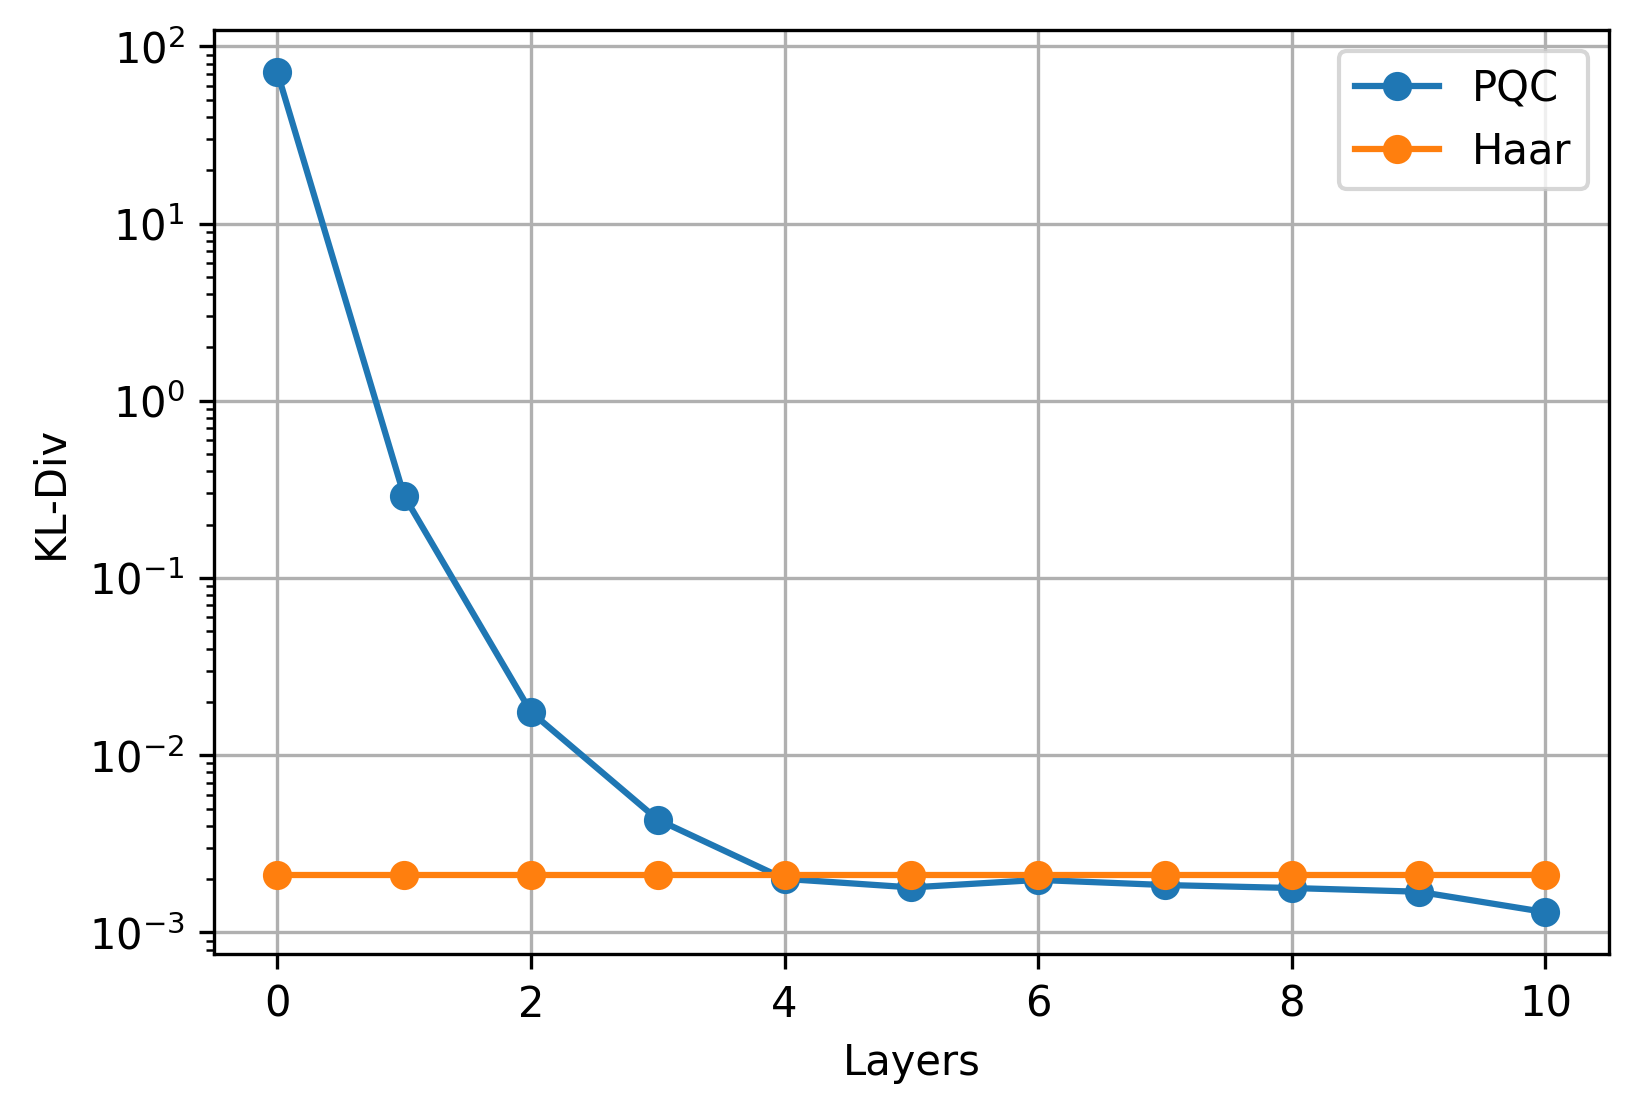

In [13]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(list(range(0,11)), KL_list, "o-")
plt.plot(list(range(0,11)), [haar_KL_mean]*11, "o-")
plt.grid()
plt.legend(["PQC", "Haar"])
plt.xlabel("Layers")
plt.ylabel("KL-Div")
plt.yscale("log")
plt.savefig("PQC_Haar_approx_4qubits.pdf", bbox_inches='tight')
plt.show()

In [14]:
np.savetxt("PQC_Haar_approx_4qubits_10Ksamples.txt", KL_list)

## More Samples

In [7]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)


bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list2 = []
for i in range(10):
    fid_list = []
    for i in tqdm(range(100000)):
        U1 = Operator(random_unitary(d)).data
        U2 = Operator(random_unitary(d)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)

    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    KL_list2.append(KL)

haar_KL_mean2 = np.mean(KL_list2)
haar_KL_std = np.std(KL_list2)

print(haar_KL_mean2)

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

0.00022770687006003608


In [17]:
KL_list = np.loadtxt("PQC_Haar_approx_4qubits_100Ksamples.txt")

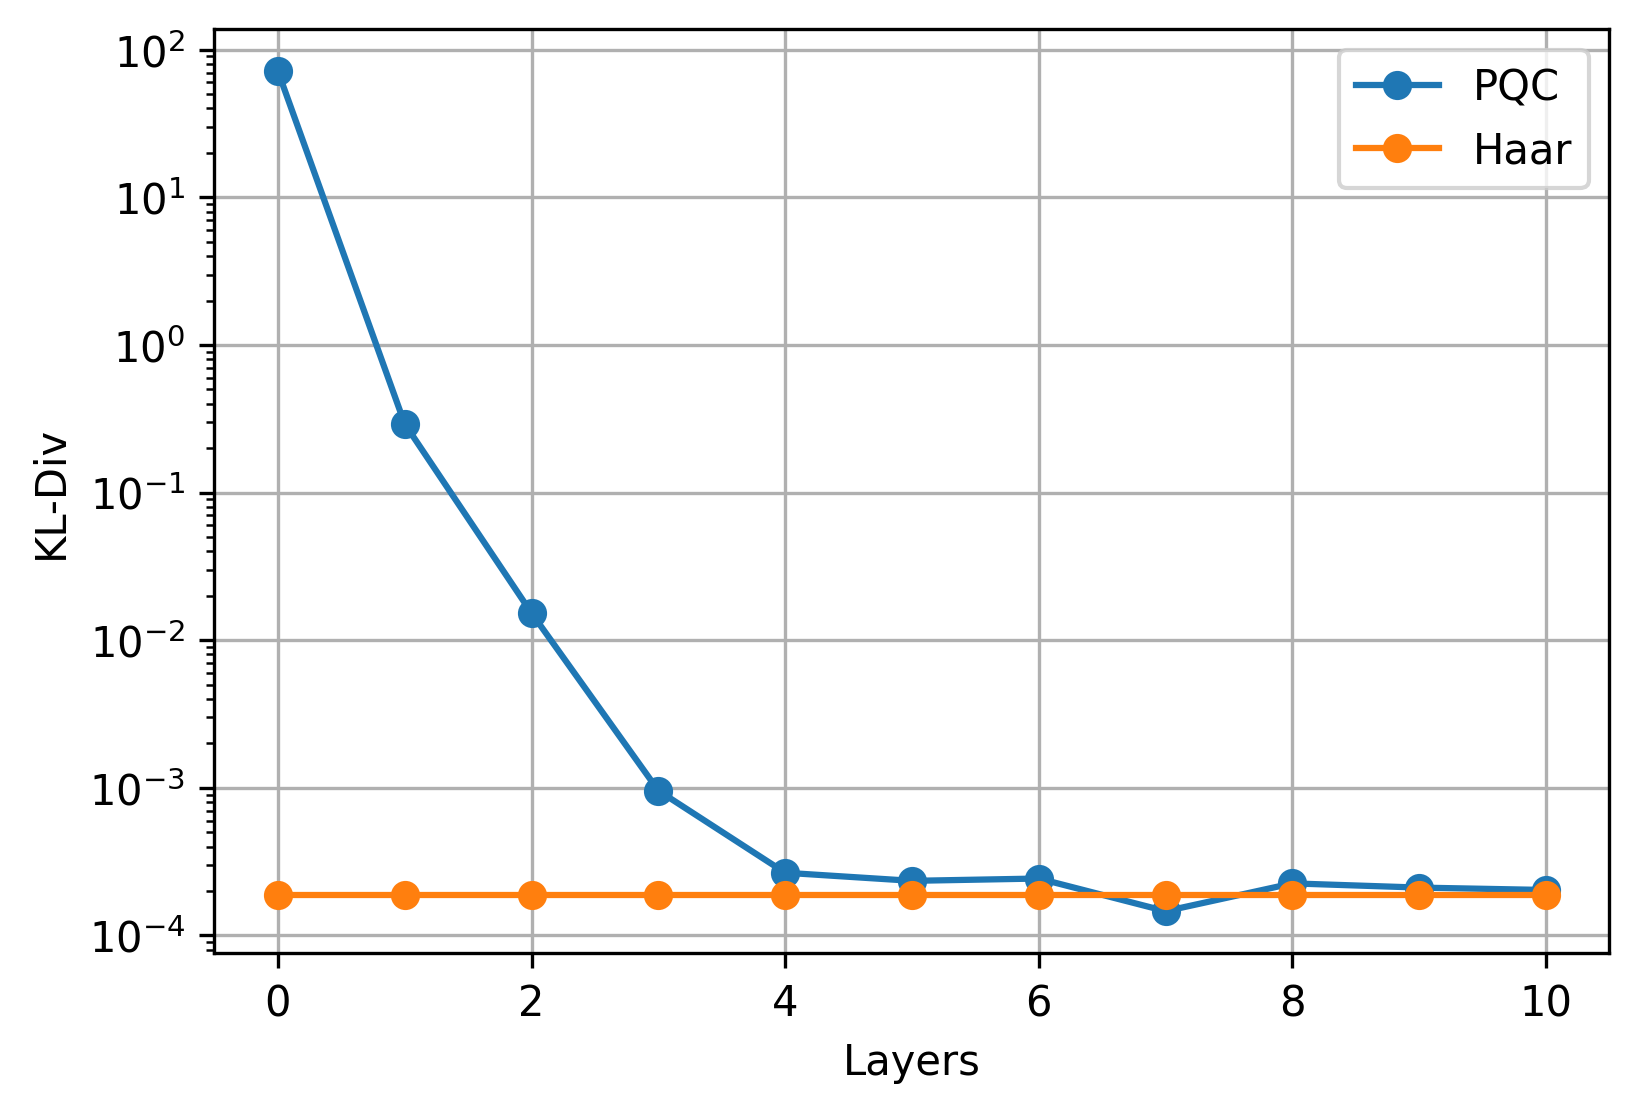

In [18]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(list(range(0,11)), KL_list, "o-")
plt.plot(list(range(0,11)), [haar_KL_mean]*11, "o-")
plt.grid()
plt.legend(["PQC", "Haar"])
plt.xlabel("Layers")
plt.ylabel("KL-Div")
plt.yscale("log")
plt.savefig("PQC_Haar_approx_4qubits.pdf", bbox_inches='tight')
plt.show()

In [3]:
KL_list1 = np.loadtxt("data/PQC_Haar_approx_4qubits_10Ksamples.txt")
KL_list2 = np.loadtxt("data/PQC_Haar_approx_4qubits_100Ksamples.txt")
haar_KL_mean1 = 0.0019689909148216263
haar_KL_mean2 = 0.00022770687006003608

11


NameError: name 'haar_KL_mean1' is not defined

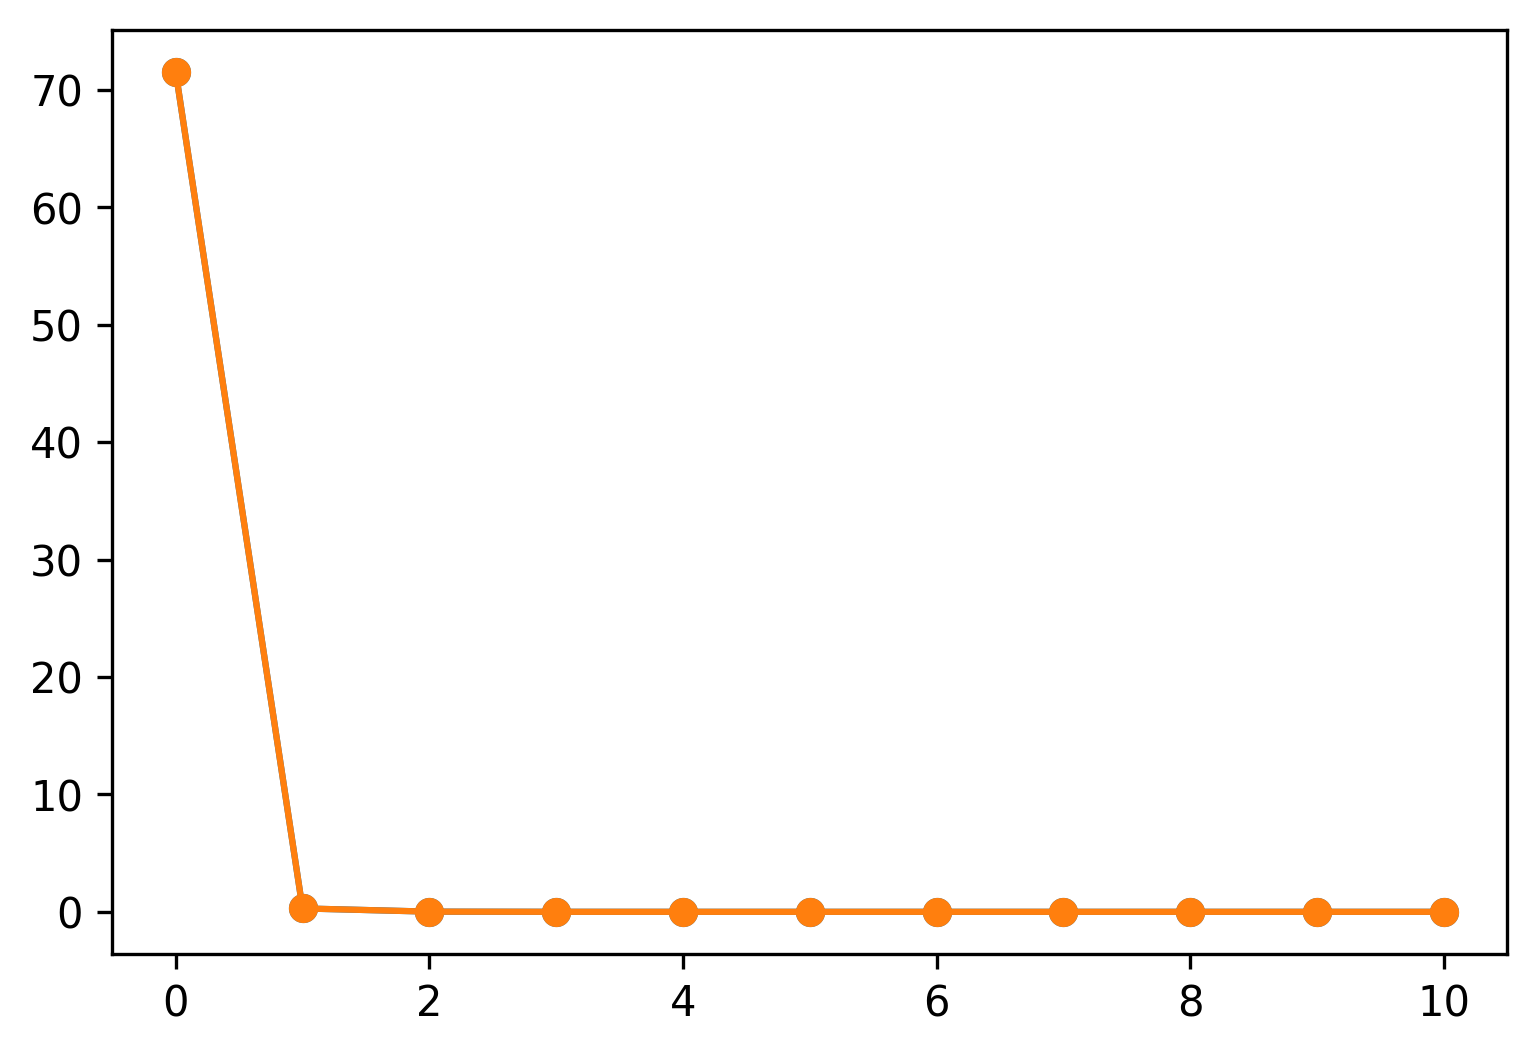

In [4]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(list(range(0,11)), KL_list1, "o-")
plt.plot(list(range(0,11)), KL_list2, "o-")
plt.plot(list(range(0,11)), [haar_KL_mean1]*11, "--")
plt.plot(list(range(0,11)), [haar_KL_mean2]*11, "--")
plt.grid()
plt.legend(["PQC, $10^4$ samples", "PQC, $10^5$ samples", "Haar, $10^4$ samples", "Haar, $10^5$ samples"])
plt.xlabel("Layers")
plt.ylabel("KL-Div")
plt.yscale("log")
plt.savefig("PQC_Haar_approx_4qubits.pdf", bbox_inches='tight')
plt.show()